In [3]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("Cleaned-Data.csv") 

# Preview the first 5 lines of the loaded data 
data.head()



,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [8]:
##Menjadikan gender dalam satu peubah kategorik

def gender(row):
   for c in ("Gender_Female","Gender_Male","Gender_Transgender"):
       if row[c]==1:
           return c

gender = data.apply(gender, axis=1)

gender.head()

0    Gender_Male
1    Gender_Male
2    Gender_Male
3    Gender_Male
4    Gender_Male
dtype: object

In [7]:
##Menjadikan severity dalam satu peubah kategorik

def severity(row):
   for c in ("Severity_Mild","Severity_Moderate","Severity_None","Severity_Severe"):
       if row[c]==1:
           return c

severity = data.apply(severity, axis=1)

severity.head()

In [9]:
##Menjadikan contact dalam satu peubah kategorik

def contact(row):
   for c in ("Contact_Dont-Know","Contact_No","Contact_Yes"):
       if row[c]==1:
           return c

contact = data.apply(contact, axis=1)

contact.head()

0          Contact_Yes
1           Contact_No
2    Contact_Dont-Know
3          Contact_Yes
4           Contact_No
dtype: object

In [20]:
##Menjadikan usia dalam satu peubah kategorik

def age(row):
   for c in ("Age_0-9","Age_10-19","Age_20-24","Age_25-59","Age_60+"):
       if row[c]==1:
           return c

age = data.apply(age, axis=1)

age.head()

0    Age_0-9
1    Age_0-9
2    Age_0-9
3    Age_0-9
4    Age_0-9
dtype: object

In [19]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [24]:
##Menggabungkan data

data1 = pd.concat([data[data.columns[0:11]],age,gender,severity,contact],axis=1)
data1.columns = ['fever','tiredness','cough','breathing','sorethroat','nosymptom','pain','nasalcongest','runnynose','diarrhea',
                'no_exp','age','gender','severity','contact']
data1.head()

,fever,tiredness,cough,breathing,sorethroat,nosymptom,pain,nasalcongest,runnynose,diarrhea,no_exp,age,gender,severity,contact
0,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_Yes
1,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_No
2,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_Dont-Know
3,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Moderate,Contact_Yes
4,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Moderate,Contact_No


In [25]:
# First we will keep a copy of data
data1_copy = data1.copy()

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data1 = data1.apply(le.fit_transform)
data1.head()

,fever,tiredness,cough,breathing,sorethroat,nosymptom,pain,nasalcongest,runnynose,diarrhea,no_exp,age,gender,severity,contact
0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,2
1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1
2,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,0,1,1,2
4,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1


In [31]:
data1.columns

Index(['fever', 'tiredness', 'cough', 'breathing', 'sorethroat', 'nosymptom',
       'pain', 'nasalcongest', 'runnynose', 'diarrhea', 'no_exp', 'age',
       'gender', 'severity', 'contact'],
      dtype='object')

In [27]:
# Importing all required packages
import numpy as np

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [29]:
from kmodes.kmodes import KModes

In [32]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters = num_clusters, init = "Cao")
    kmode.fit_predict(data1)
    cost.append(kmode.cost_)

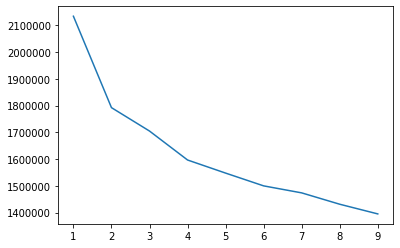

In [33]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [34]:
km_cao = KModes(n_clusters = 4, init = "Cao")
fitClusters_cao = km_cao.fit_predict(data1)

In [35]:
fitClusters_cao

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [36]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data1.columns
clusterCentroidsDf

,fever,tiredness,cough,breathing,sorethroat,nosymptom,pain,nasalcongest,runnynose,diarrhea,no_exp,age,gender,severity,contact
0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,1,1,0,1,2,3,0
3,1,1,1,1,1,0,0,0,0,1,0,2,0,2,0


In [40]:
data1 = data1_copy

In [41]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data1, clustersDf], axis = 1)
combinedDf.head()

,fever,tiredness,cough,breathing,sorethroat,nosymptom,pain,nasalcongest,runnynose,diarrhea,no_exp,age,gender,severity,contact,cluster_predicted
0,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_Yes,0
1,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_No,0
2,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Mild,Contact_Dont-Know,0
3,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Moderate,Contact_Yes,0
4,1,1,1,1,1,0,1,1,1,1,0,Age_0-9,Gender_Male,Severity_Moderate,Contact_No,0


In [42]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [43]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125600 entries, 0 to 316524
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   fever              125600 non-null  int64 
 1   tiredness          125600 non-null  int64 
 2   cough              125600 non-null  int64 
 3   breathing          125600 non-null  int64 
 4   sorethroat         125600 non-null  int64 
 5   nosymptom          125600 non-null  int64 
 6   pain               125600 non-null  int64 
 7   nasalcongest       125600 non-null  int64 
 8   runnynose          125600 non-null  int64 
 9   diarrhea           125600 non-null  int64 
 10  no_exp             125600 non-null  int64 
 11  age                125600 non-null  object
 12  gender             125600 non-null  object
 13  severity           125600 non-null  object
 14  contact            125600 non-null  object
 15  cluster_predicted  125600 non-null  uint16
dtypes: int64(11), object

In [44]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81890 entries, 304 to 316799
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fever              81890 non-null  int64 
 1   tiredness          81890 non-null  int64 
 2   cough              81890 non-null  int64 
 3   breathing          81890 non-null  int64 
 4   sorethroat         81890 non-null  int64 
 5   nosymptom          81890 non-null  int64 
 6   pain               81890 non-null  int64 
 7   nasalcongest       81890 non-null  int64 
 8   runnynose          81890 non-null  int64 
 9   diarrhea           81890 non-null  int64 
 10  no_exp             81890 non-null  int64 
 11  age                81890 non-null  object
 12  gender             81890 non-null  object
 13  severity           81890 non-null  object
 14  contact            81890 non-null  object
 15  cluster_predicted  81890 non-null  uint16
dtypes: int64(11), object(4), uint16(1)
me

In [45]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68570 entries, 401 to 316796
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fever              68570 non-null  int64 
 1   tiredness          68570 non-null  int64 
 2   cough              68570 non-null  int64 
 3   breathing          68570 non-null  int64 
 4   sorethroat         68570 non-null  int64 
 5   nosymptom          68570 non-null  int64 
 6   pain               68570 non-null  int64 
 7   nasalcongest       68570 non-null  int64 
 8   runnynose          68570 non-null  int64 
 9   diarrhea           68570 non-null  int64 
 10  no_exp             68570 non-null  int64 
 11  age                68570 non-null  object
 12  gender             68570 non-null  object
 13  severity           68570 non-null  object
 14  contact            68570 non-null  object
 15  cluster_predicted  68570 non-null  uint16
dtypes: int64(11), object(4), uint16(1)
me

In [46]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40740 entries, 11 to 316403
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fever              40740 non-null  int64 
 1   tiredness          40740 non-null  int64 
 2   cough              40740 non-null  int64 
 3   breathing          40740 non-null  int64 
 4   sorethroat         40740 non-null  int64 
 5   nosymptom          40740 non-null  int64 
 6   pain               40740 non-null  int64 
 7   nasalcongest       40740 non-null  int64 
 8   runnynose          40740 non-null  int64 
 9   diarrhea           40740 non-null  int64 
 10  no_exp             40740 non-null  int64 
 11  age                40740 non-null  object
 12  gender             40740 non-null  object
 13  severity           40740 non-null  object
 14  contact            40740 non-null  object
 15  cluster_predicted  40740 non-null  uint16
dtypes: int64(11), object(4), uint16(1)
mem

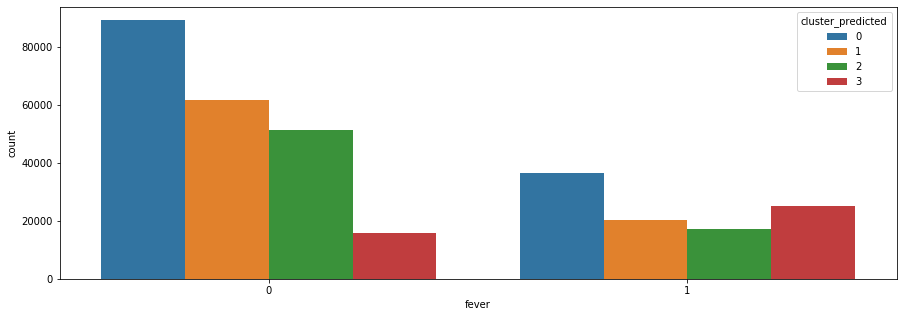

In [65]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['Fever'])
plt.show()

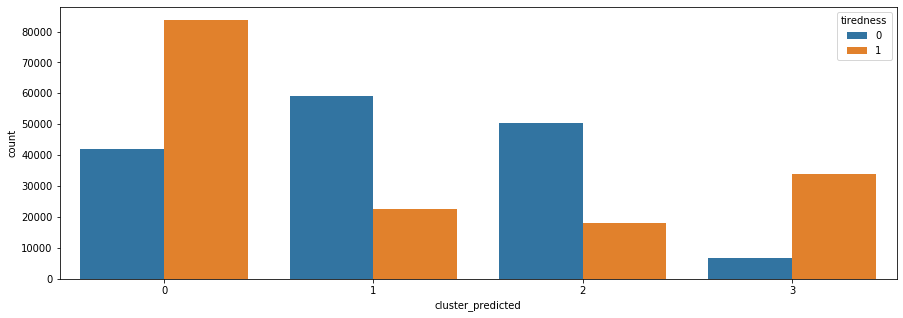

In [49]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['tiredness'])
plt.show()

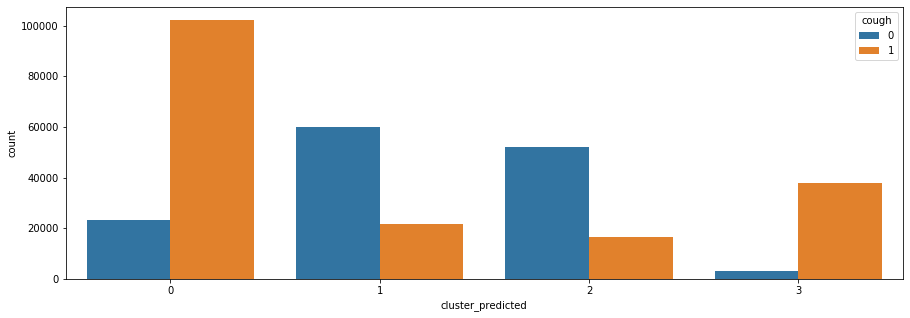

In [50]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['cough'])
plt.show()

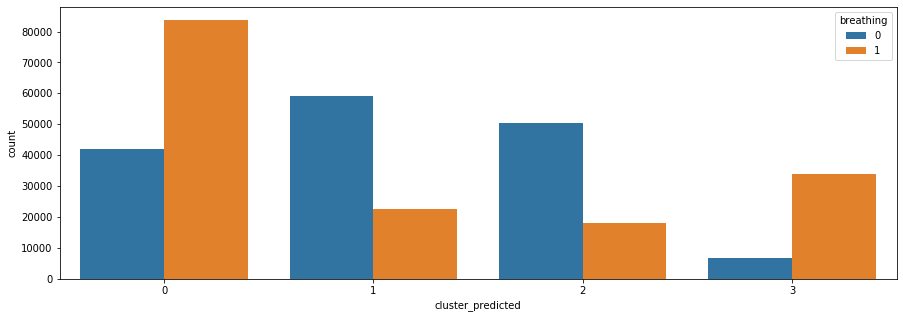

In [51]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['breathing'])
plt.show()

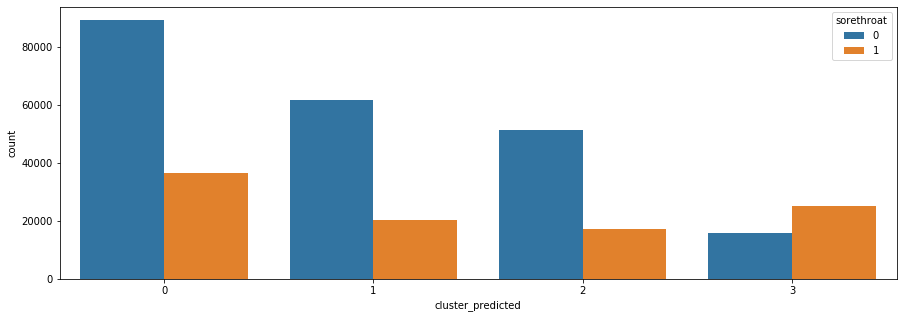

In [52]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['sorethroat'])
plt.show()

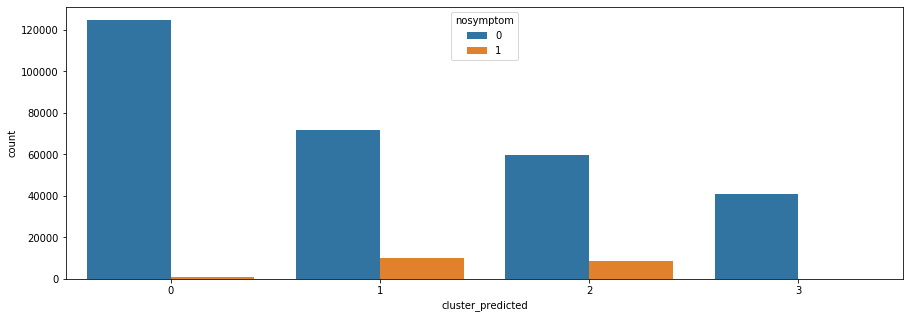

In [53]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['nosymptom'])
plt.show()

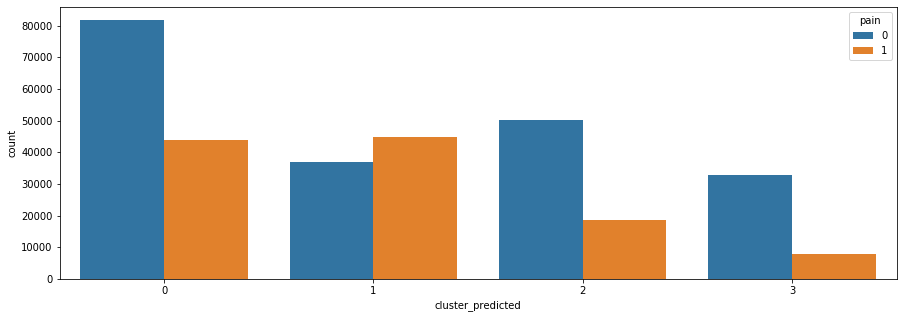

In [54]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['pain'])
plt.show()

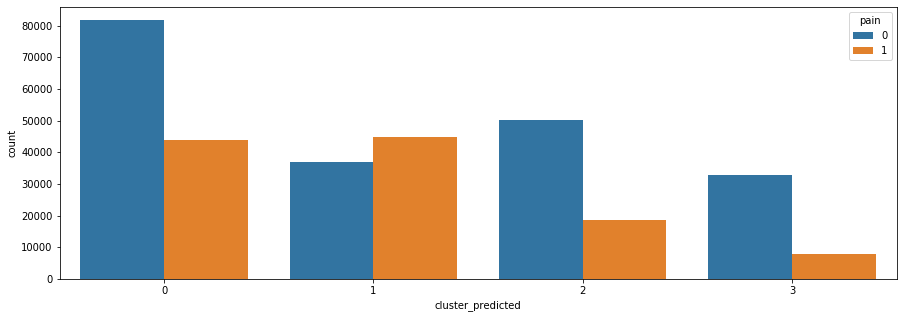

In [55]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['pain'])
plt.show()

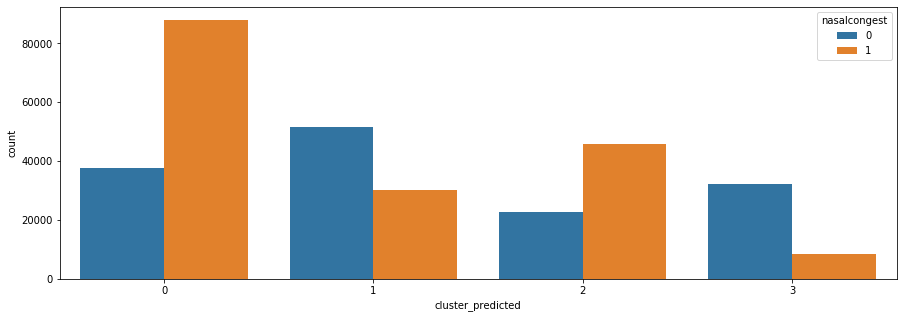

In [56]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['nasalcongest'])
plt.show()

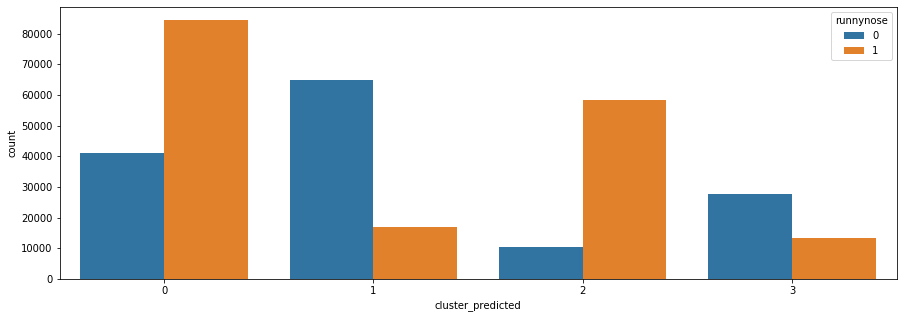

In [57]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['runnynose'])
plt.show()

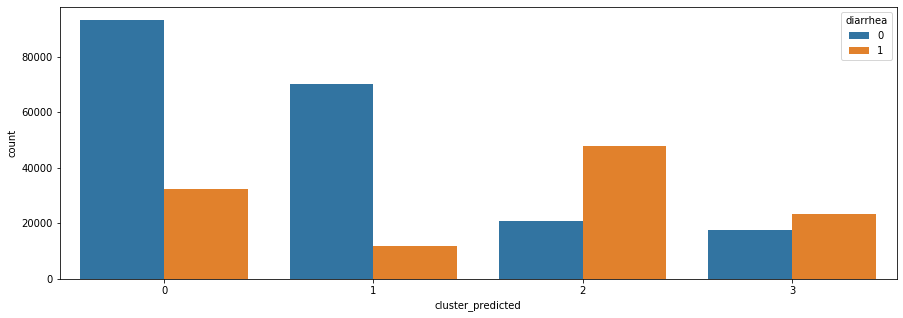

In [58]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['diarrhea'])
plt.show()

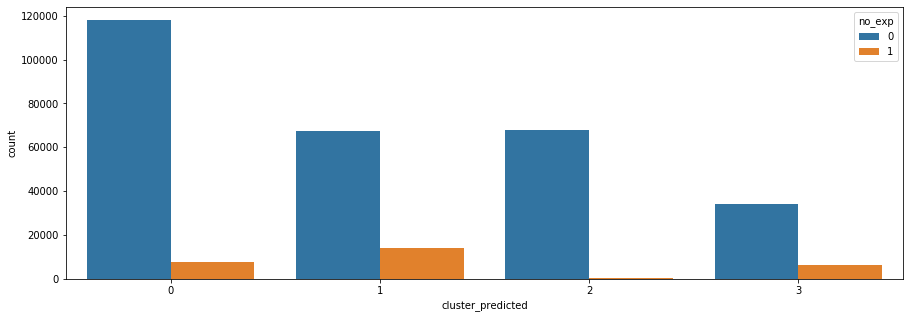

In [59]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['no_exp'])
plt.show()

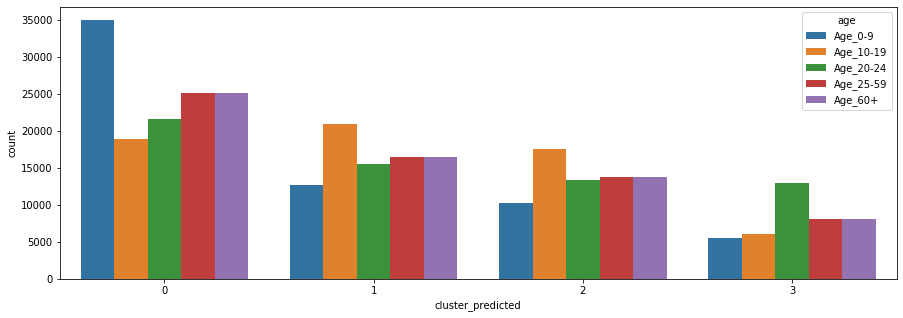

In [60]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['age'])
plt.show()

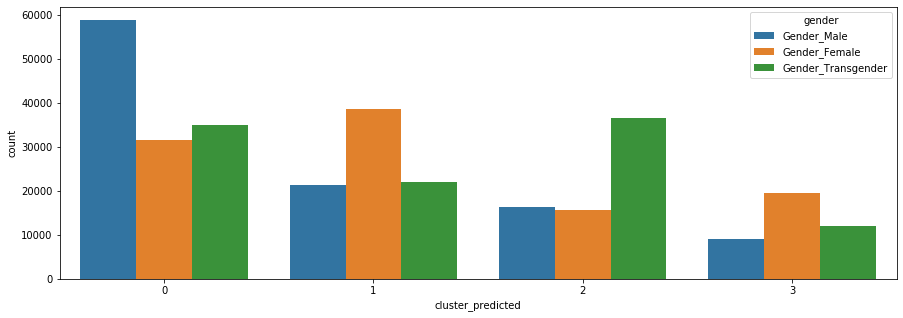

In [61]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['gender'])
plt.show()

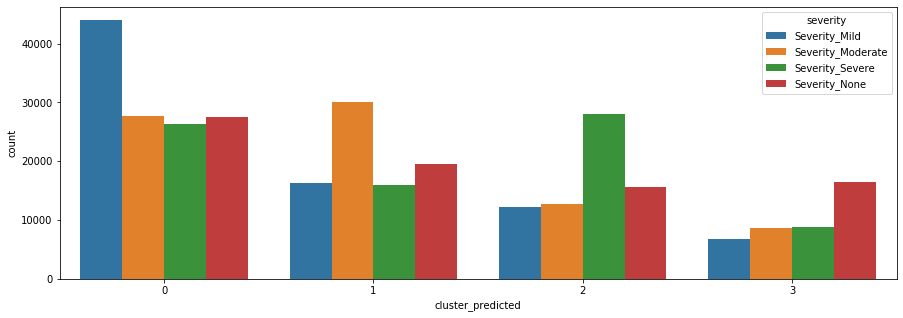

In [66]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['severity'])
plt.show()

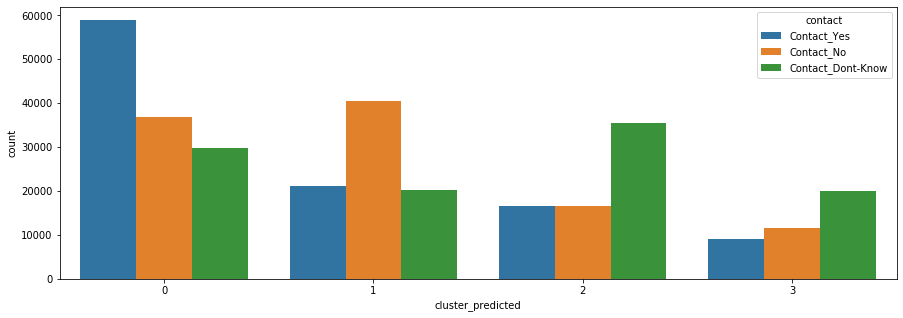

In [63]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['contact'])
plt.show()